# Signal processing example, revisisted
This time, sample from the likelihood

### Recall our sine-Gaussian signal in noisy data

In [1]:
import numpy as np

import matplotlib 
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (5, 3)
import matplotlib.pyplot as plt

In [2]:
def sinGauss(t, tau, A = 1, f = 3, s = 1):

    '''return sine-Gaussian pulse on time array t
    
    inputs: t -- array of times
            tau -- float, central time
            A -- float, amplitude of signal
            f -- float, central frequency of signal
            s -- float, width of Gaussian

    returns: sine-Gaussian pulse -- array of same shape as t
    '''

    return A * np.sin(2 * np.pi * f * t) * np.exp(-np.square(t-tau)/(2*np.square(s)))


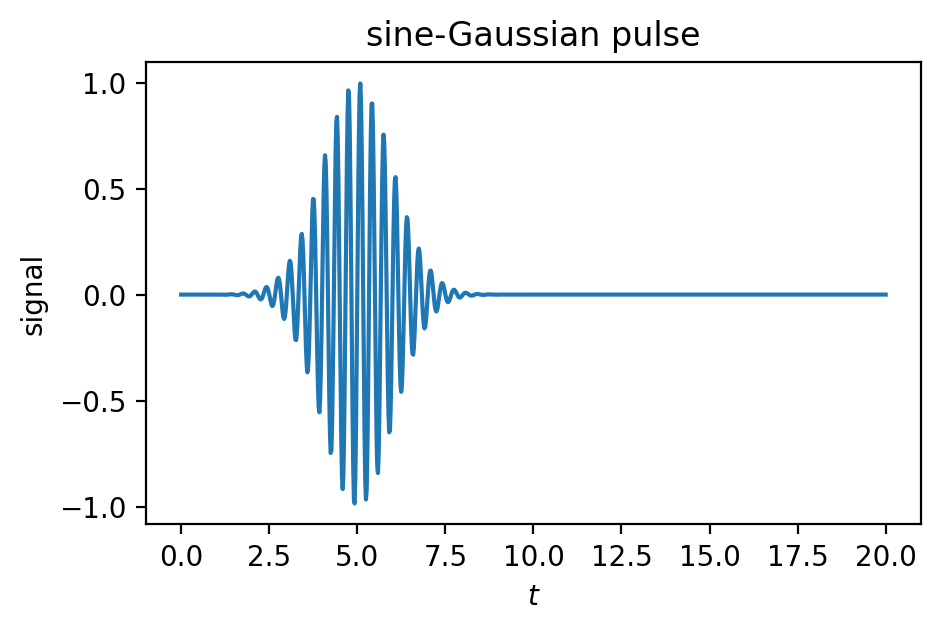

In [3]:
t = np.linspace(0, 20, 1000)

tau_true = 5

signal = sinGauss(t, tau_true)

plt.plot(t, signal)
plt.xlabel('$t$')
plt.ylabel('signal')
plt.title('sine-Gaussian pulse')
plt.show()

### Introduce Gaussian noise

This signal will be hidden in noise, where the random process generating the noise is a zero-mean Gaussian process with a known standard deviation (white Gaussian noise). 

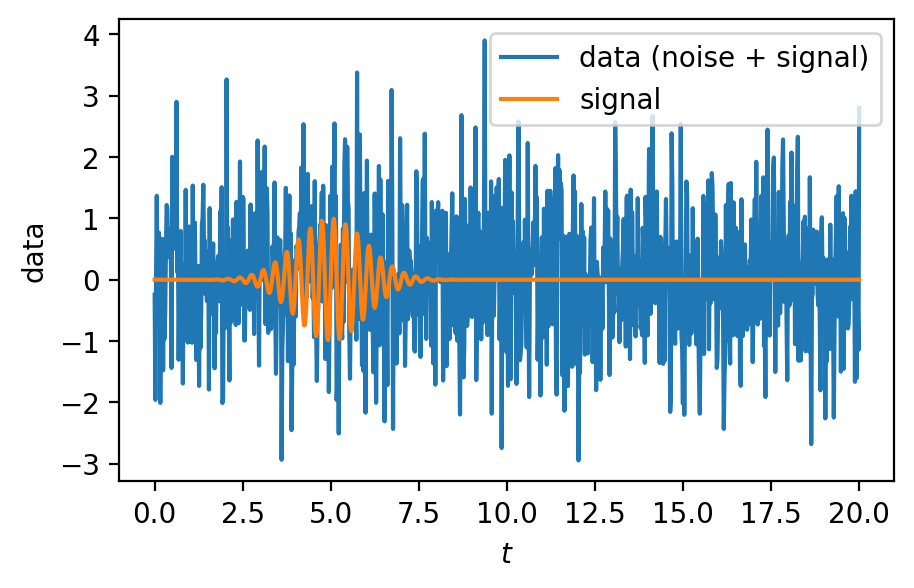

In [4]:
noise_sigma = 1

noise = np.random.normal(0, noise_sigma, t.size)

data = noise + signal

plt.plot(t, data, label = 'data (noise + signal)')
plt.plot(t, signal, label = 'signal')
plt.xlabel(r'$t$')
plt.ylabel('data')
plt.legend(loc = 'best')
plt.show()

### Recall the likelihood

In [5]:
def log_likelihood(data, t, tau, A=1, f = 3, s = 1, sigma_noise=1):
    
    logL = -0.5*np.trapezoid(np.square((data - sinGauss(t,tau,A,f,s))/sigma_noise), t) #use trapezoidal integration

    return logL

Can you simultaneously fit tau, A, f and s by sampling from your likelihood?